In [6]:
# Cargo el dataset
circle <- read.csv("circle.csv",header= F)

a <- as.matrix(circle[,-3])
b <- as.matrix(circle[,3])

head(circle)

,V1,V2,V3
,<dbl>,<dbl>,<int>
1,"-0,9719350","0,846927",0
2,"-0,5529950","-0,576830",0
3,"-0,0949043","-0,298862",1
4,"-0,8095640","0,856891",0
5,"0,3990090","0,690462",0
6,"-0,6736180","-0,684443",0


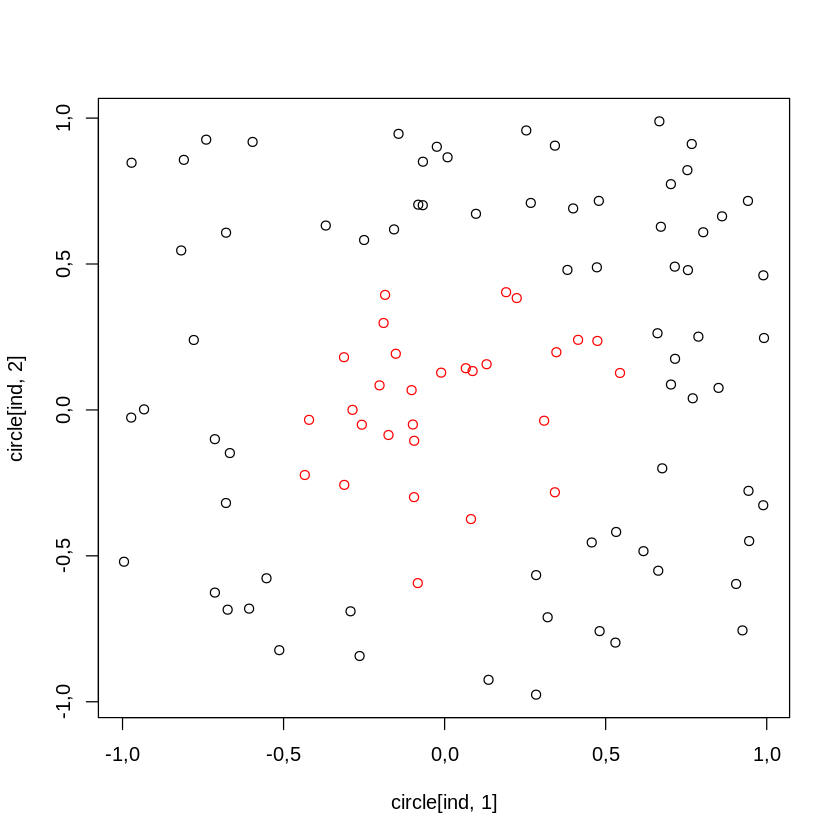

In [7]:
# Miro que pinta tiene
ind = which(circle[,3] == 0)

plot(circle[ind,1],
     circle[ind,2],
     type="p")

lines(circle[-ind,1],
      circle[-ind,2],
      type="p",
      col="red")

In [17]:
# Defino la función de activación (la sigmoide en este caso)
activation <- function(z) {
    1/(1 + exp(-z))
}

# Defino aquí la función de back propagation

# h = numero de neuronas de la capa oculta
backprop_mlp <- function(x, y, epochs = 10, eta = 0.1, h = 2) {
    
    # Inicializar matrices y listas
    errors <- c()
    
    # Añado el bias a los valores de entrada
    x <- cbind(x, rep(1,nrow(x)))
    
    # numero de pesos de las x a la primera capa = ncol(x) * h
    neurons_1 <- c(ncol(x),h)
    # y ahora los pesos, con valores generados al azar
    Weights_1 <- matrix(data = runif(prod(neurons_1), min = -1, max = 1),
        nrow = neurons_1[2], 
        ncol = neurons_1[1])

    # numero de pesos de la primera capa a la salida = h * ncol(y)
    neurons_2 <- c(h,ncol(y))
    # y ahora los pesos, con valores generados al azar
    Weights_2 <- matrix(data = runif(prod(neurons_2), min = -1, max = 1),
        nrow = neurons_2[2], 
        ncol = neurons_2[1])
    
    for (j in 1:epochs) {
        
        # Defino las variables que necesito, propagando hacía adelante
        h_1   <- activation(x   %*% t(Weights_1))
        y_out <- activation(h_1 %*% t(Weights_2))
        
        # error = (b - b^)
        error <- y - y_out
        
        # aux = (b - b^) * f(B)(1 - f(B)) 
        aux   <- error * y_out * (1 - y_out)
        
        # Calculo los DeltaW
        # Para los pesos de capa oculta a salida: DeltaWeights_2 = - eta * (aux*h_1)
        Wdelta_2  <- t(aux) %*% h_1
        Weights_2 <- Weights_2 + eta * Wdelta_2
        
        # Para los pesos de entrada a capa oculta: DeltaWeights_1 = - eta * (aux*Weights_2*aux_2*x)
        aux_2 <- h_1 * (1 - h_1)
        
        Wdelta_1  <- t((aux %*% Weights_2) * aux_2) %*% x
        Weights_1 <- Weights_1 + eta * Wdelta_1
                
        # Error output
        errors <- c(errors, sum(error**2))
}
    
### Return values
plot(errors)  
    
Weights = list(Weights_1, Weights_2)    
return(Weights)
}

V1,V2,
"-1,980061","5,4406333","-1,971592"
"-8,476947","-0,4467001","3,648674"
"-1,370174","-4,2632266","-1,195500"
"-9,899202","7,211484","-9,721105"


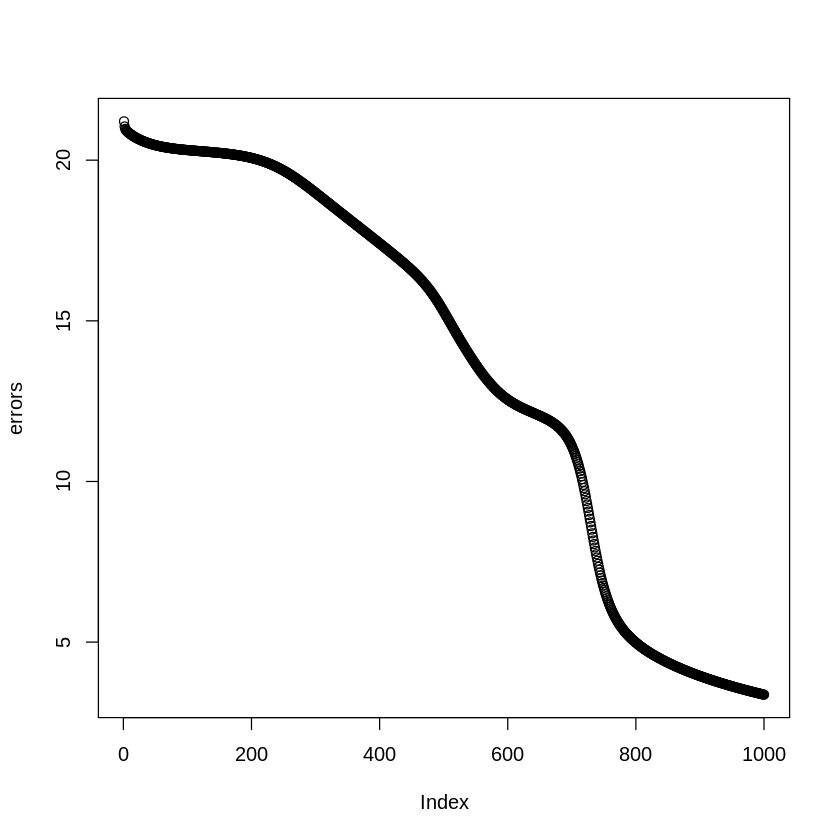

In [20]:
backprop_mlp(a, b, h = 3, epochs= 1000, eta = 0.1) 